In [ ]:
#Keep this section; ensures that before any cell is run, all modules are reloaded
%reload_ext autoreload
%autoreload 2

# **Machine Learning Project: Car Price Prediction**


## **Overview of Business Opportunity​**

## **Client:** Python Used Cars, with branches in India​

## **Data Set:** Ultimate Car Price Prediction ​

## **Business Problem:** Python Motors is grappling with the intricate task of determining the most advantageous pricing for its pre-owned vehicles, a critical factor in driving sales and maintaining a competitive edge in the fast-paced used car market. To address this, they plan to implement an analytics solution that can parse through historical sales data and suggest a price range. This system will empower sales staff by providing instant, optimal pricing suggestions once a vehicle's details are inputted. Ultimately, this tool aims to streamline the pricing process, boost inventory turnover, and uphold customer satisfaction with fair and transparent pricing strategies.​

## <span style="font-size:16px">Team Members: </span>

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import joblib
import re
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

Note: GenerativeAI was used to brainstorm, plan, generate and troubleshoot code as well as interpret results.

In [ ]:
# Load csv
car_df = pd.read_csv("Clean Data_pakwheels.csv")

# Set the precision option
pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [ ]:
from ml_helper import preprocess_car_df
car_df = preprocess_car_df(car_df)

car_df.head(5)

,ID,Company Name,Model Name,Price USD,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly,Body Type,Transmission Type,Registration Status
0,0,Toyota,Vitz,8347.50,2017,Islamabad,6132.31,Petrol,1000,Silver,Imported,Hatchback,Automatic,Un-Registered
1,1,Toyota,Corolla,388.50,2019,KPK,6904.05,Petrol,1300,White,Local,Sedan,Automatic,Registered
2,2,Suzuki,Alto,5355.00,2019,KPK,10873.99,Petrol,660,White,Local,Hatchback,Automatic,Un-Registered
3,3,Suzuki,Alto,5775.00,2019,Punjab,5965.16,Petrol,660,White,Local,Hatchback,Manual,Registered
4,4,Toyota,Corolla,5022.50,2010,Islamabad,74564.52,Petrol,1300,Black,Local,Sedan,Manual,Registered


<span style="font-size:20px">**Feature Descriptions**</span>

In [ ]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46022 entries, 0 to 46021
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   46022 non-null  int64  
 1   Company Name         46022 non-null  object 
 2   Model Name           46022 non-null  object 
 3   Price USD            46022 non-null  float64
 4   Model Year           46022 non-null  int64  
 5   Location             46022 non-null  object 
 6   Mileage              46022 non-null  float64
 7   Engine Type          46022 non-null  object 
 8   Engine Capacity      46022 non-null  int64  
 9   Color                46022 non-null  object 
 10  Assembly             46022 non-null  object 
 11  Body Type            46022 non-null  object 
 12  Transmission Type    46022 non-null  object 
 13  Registration Status  46022 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 4.9+ MB


In [ ]:
car_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,46022.00,23010.53,13285.60,0.00,11505.25,23010.50,34515.75,46022.00
Price USD,46022.00,7049.54,10286.75,388.50,2975.00,5075.00,8050.00,271250.00
Model Year,46022.00,2011.04,6.40,1990.00,2007.00,2013.00,2016.00,2019.00
Mileage,46022.00,56523.09,39554.40,0.62,30384.73,49709.68,74564.52,621370.38
Engine Capacity,46022.00,1313.12,614.69,16.00,1000.00,1300.00,1500.00,6600.00


In [ ]:
print("Column datatypes: ")
print(car_df.dtypes)

Column datatypes: 
ID                       int64
Company Name            object
Model Name              object
Price USD              float64
Model Year               int64
Location                object
Mileage                float64
Engine Type             object
Engine Capacity          int64
Color                   object
Assembly                object
Body Type               object
Transmission Type       object
Registration Status     object
dtype: object


In [ ]:
from eda_helper import (data_field_descriptions,list_data_descriptors)
list_data_descriptors(car_df, data_field_descriptions)

No description available for column: ID

Column: Company Name
Data Type: object
Description: Company name for each car brand
Valid Values/Ranges: Non-negative objects
Missing Values: none
Source: Car_data.csv
Additional Notes: There are 31 company names

Column: Model Name
Data Type: object
Description: Model Name of each car
Valid Values/Ranges: Non-negative objects
Missing Values: None
Source: Car_data.csv
Additional Notes: Multiple model names belong to one company

Column: Price USD
Data Type: integer
Description: Price of the car converted to U.S. Dollars
Valid Values/Ranges: Non-negative integers
Missing Values: None
Source: Car_data.csv

Column: Model Year
Data Type: Integer
Description: Model year for each car
Valid Values/Ranges: Non-negative integers
Missing Values: none
Source: Car_data.csv
Additional Notes: There are 196 model names

Column: Location
Data Type: object
Description: The location of each car in India
Valid Values/Ranges: Non-negative objects
Missing Values: No

In [ ]:
print(f"Number of records: {car_df.shape[0]:,}")

Number of records: 46,022


In [ ]:
car_df.shape

(46022, 14)

## **EDA Visualizations**

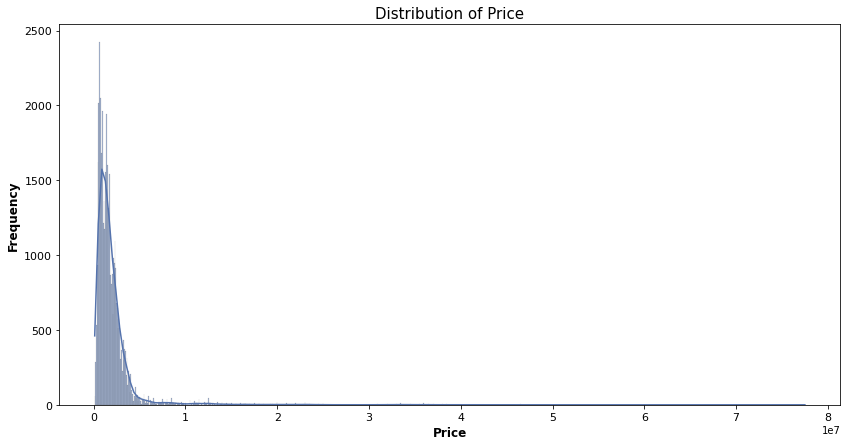

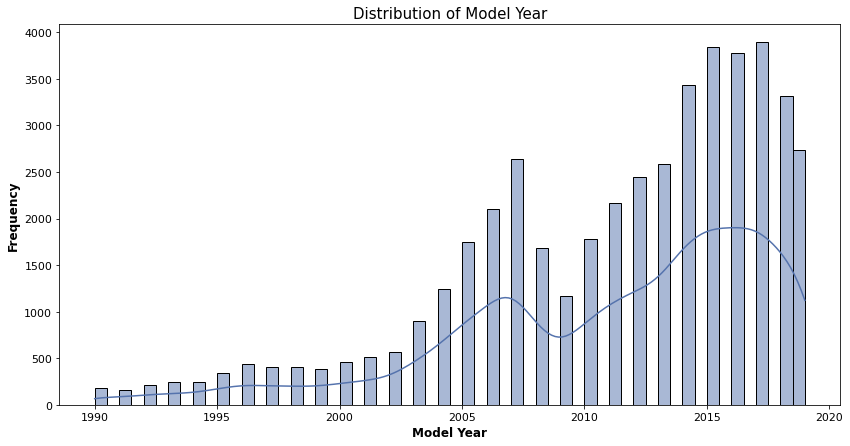

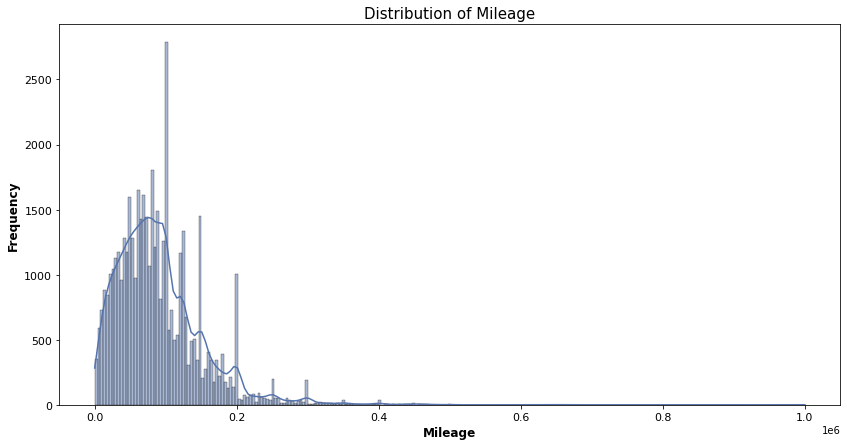

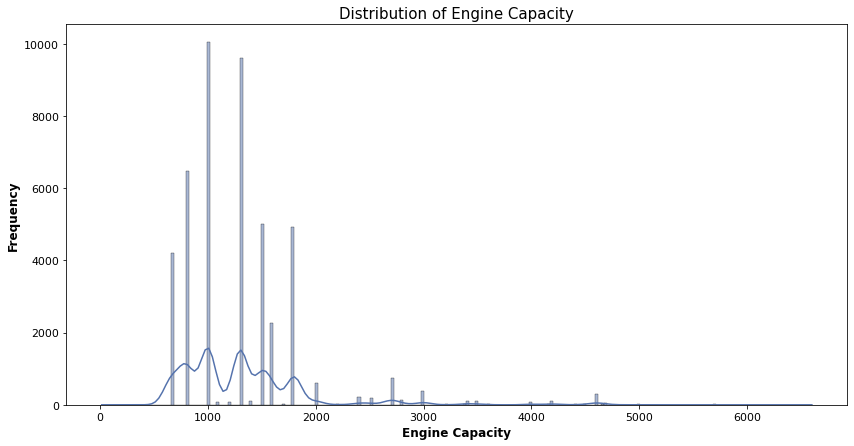

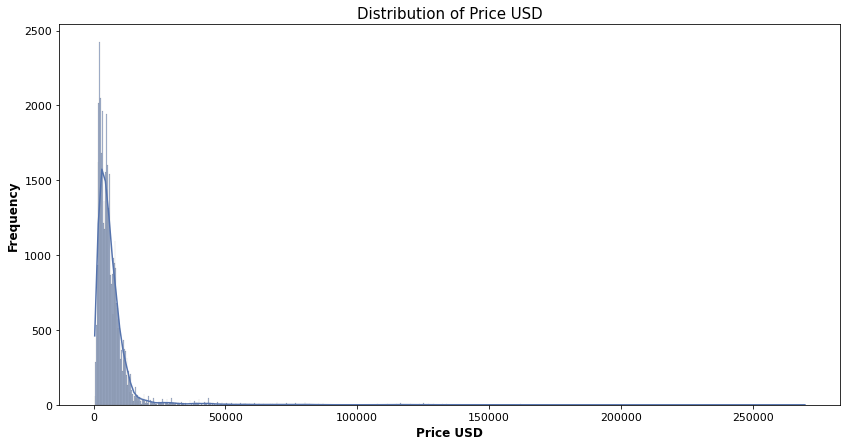

In [ ]:
from eda_helper import (plot_numeric_histograms,num_cols)
num_cols.remove("ID")
plot_numeric_histograms()

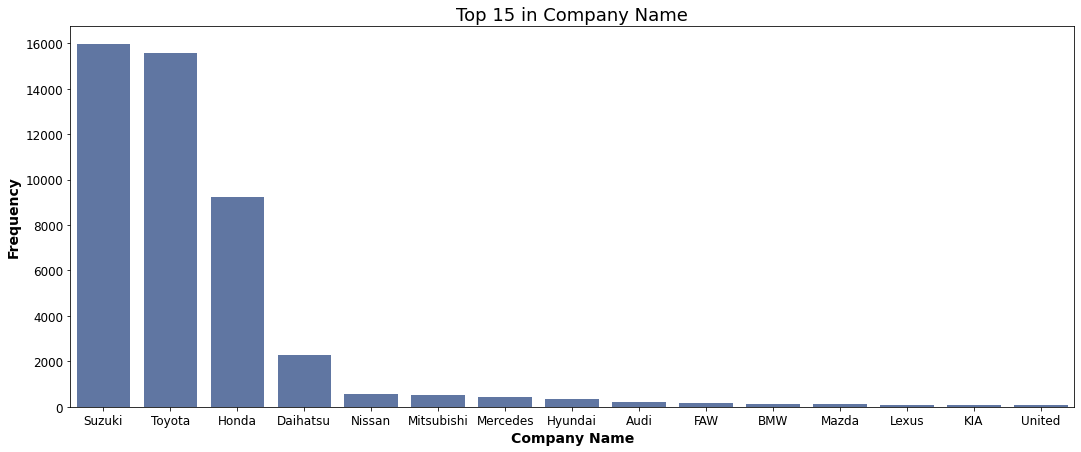

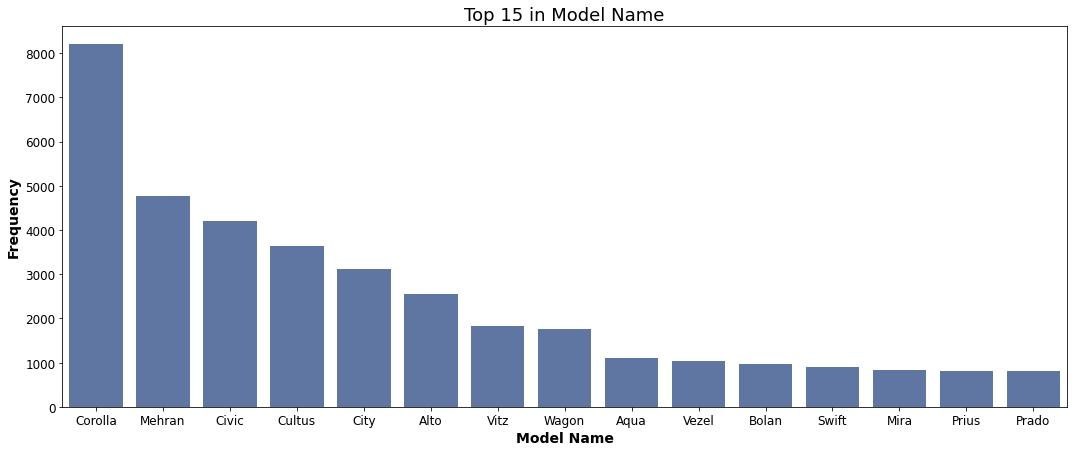

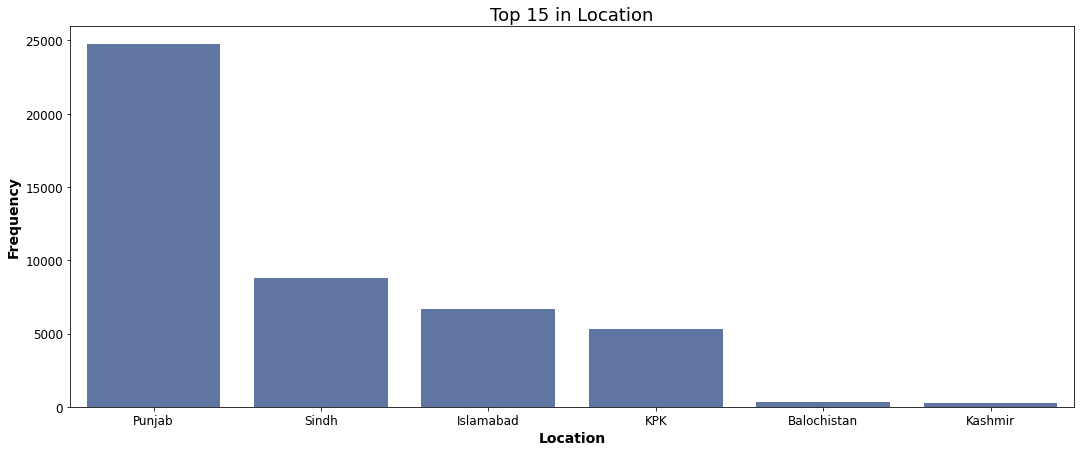

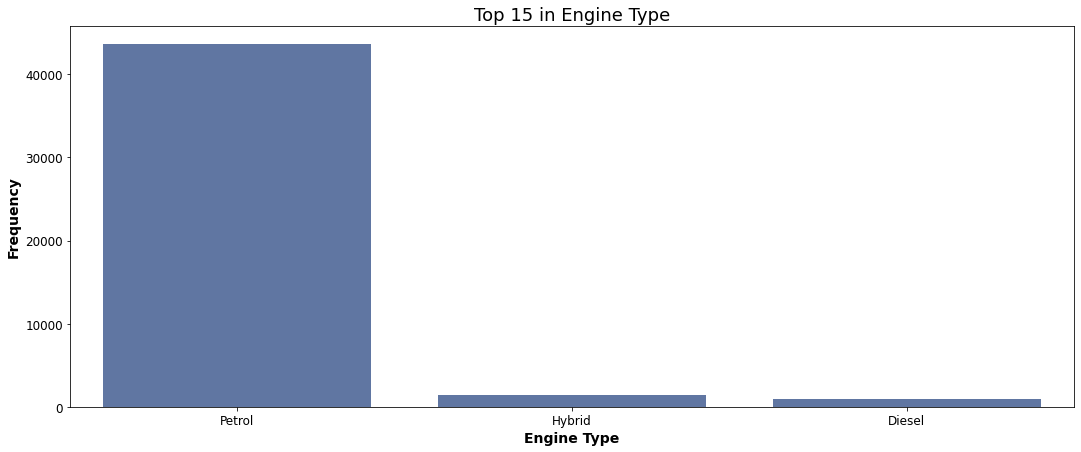

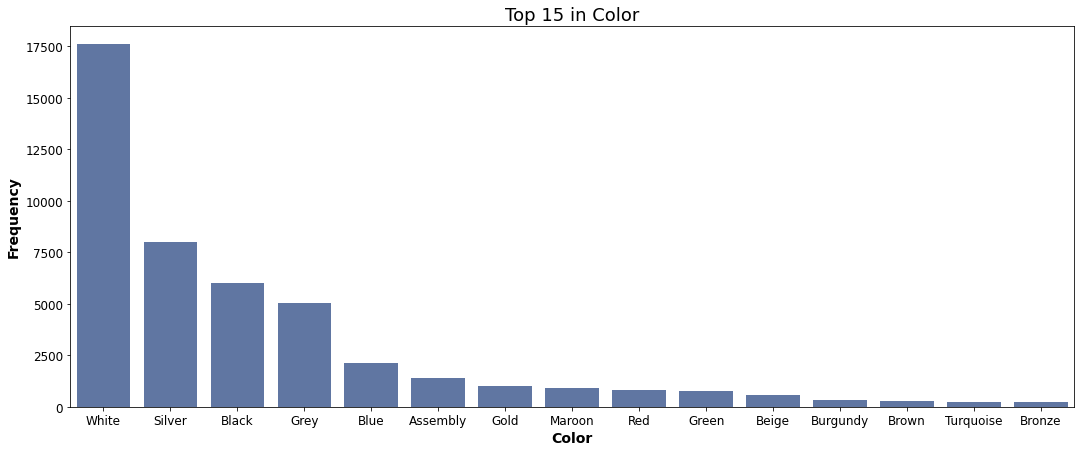

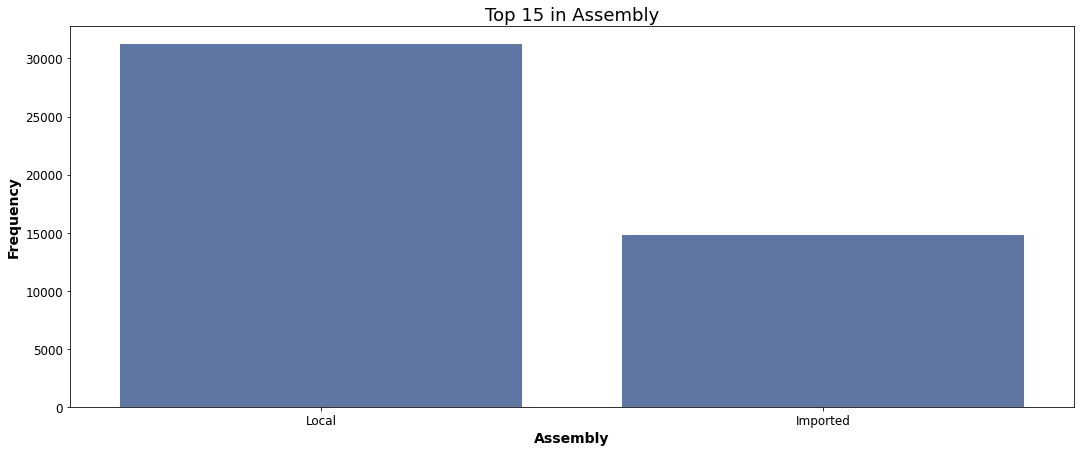

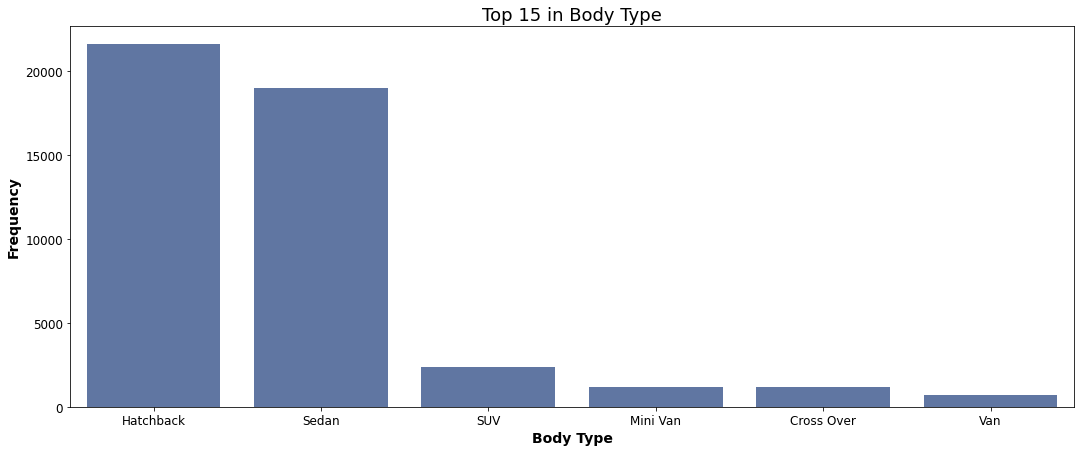

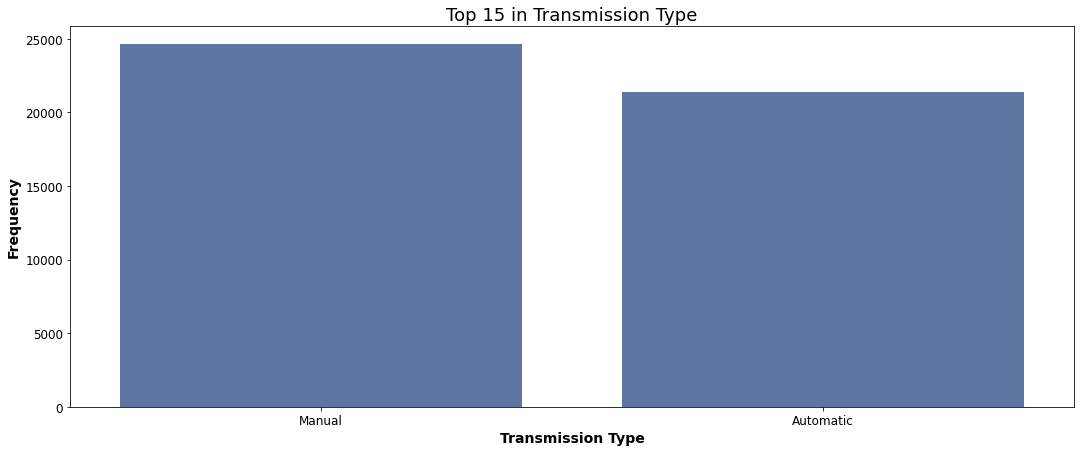

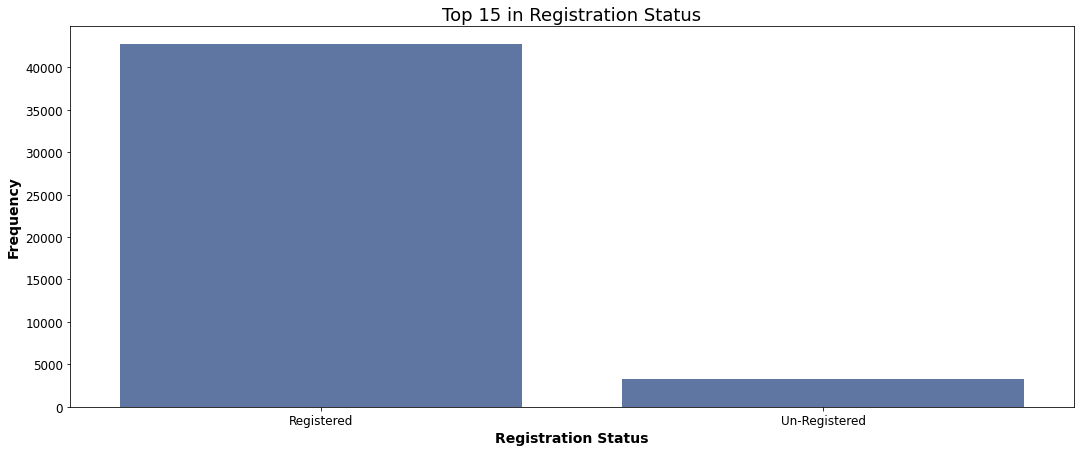

In [ ]:
from eda_helper import (plot_category_barplots,cat_cols)
plot_category_barplots()

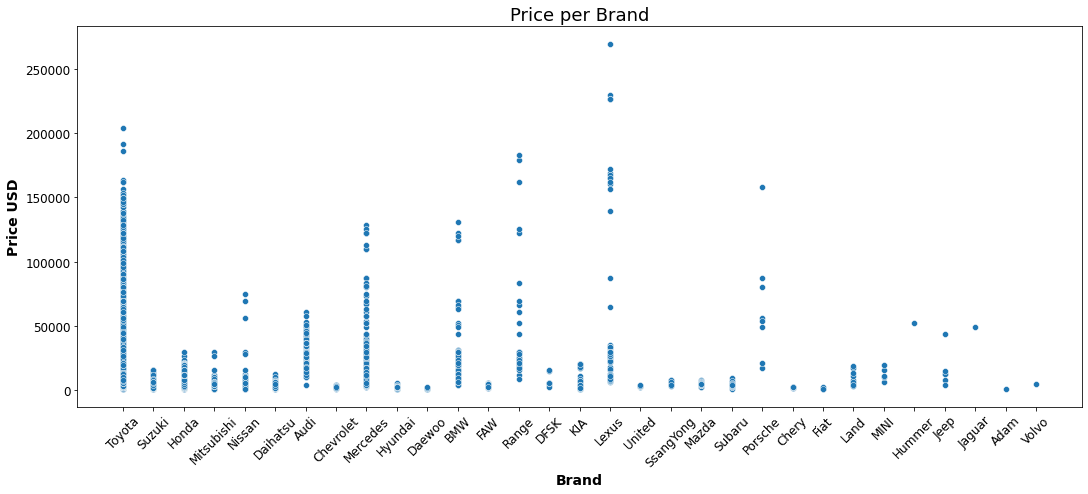

In [ ]:
from eda_helper import (plot_price_per_company_scatter)
plot_price_per_company_scatter()

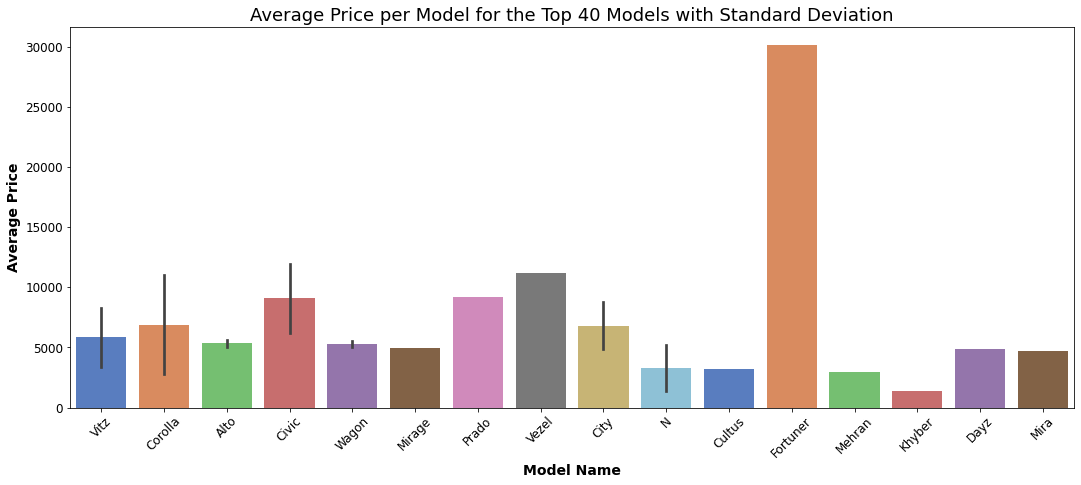

In [ ]:
from eda_helper import (plot_price_per_model_bar)
plot_price_per_model_bar()

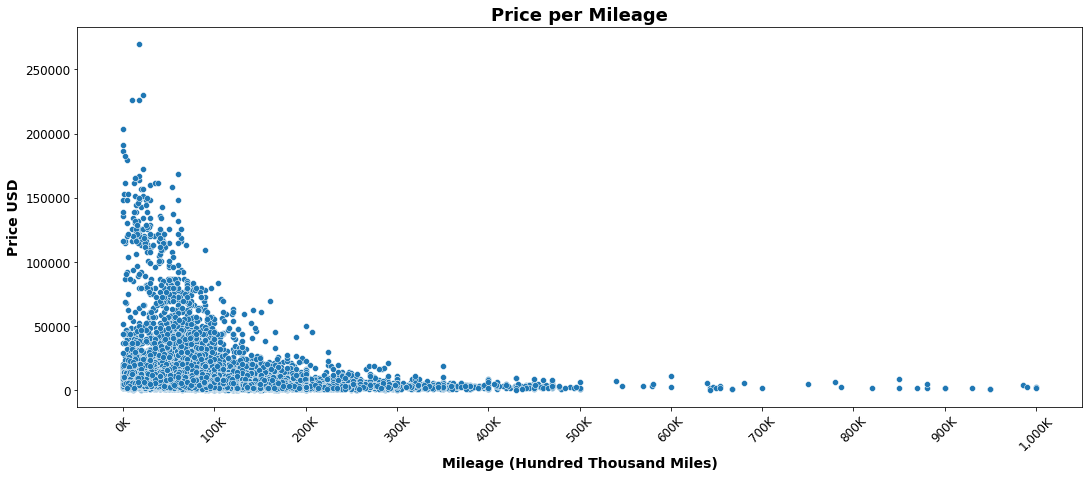

In [ ]:
from eda_helper import (plot_price_per_mile_scatter)
plot_price_per_mile_scatter()

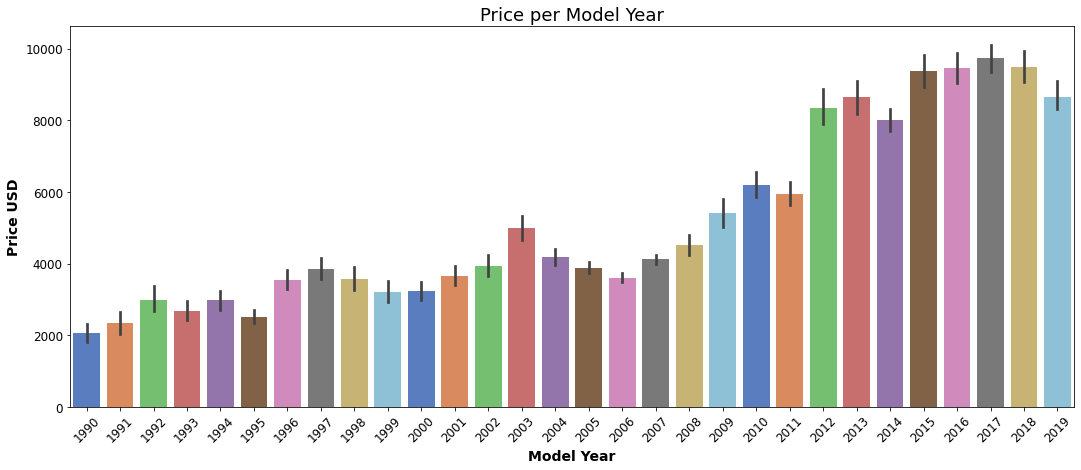

In [ ]:
from eda_helper import(plot_price_per_modelyear_bar)
plot_price_per_modelyear_bar()

## **Correlations**

In [ ]:
from ml_helper2 import(cat_cols,num_cols,calculate_cramers_v)
pearson_corr = car_df[num_cols].corr()
calculate_cramers_v(car_df, cat_cols)


Cramer's V Correlation for Categorical Features:
                     Company Name  Model Name  Location  Engine Type  Color  \
Company Name                 1.00        0.98      0.09         0.21   0.08   
Model Name                   0.98        1.00      0.14         0.58   0.14   
Location                     0.09        0.14      1.00         0.11   0.05   
Engine Type                  0.21        0.58      0.11         1.00   0.08   
Color                        0.08        0.14      0.05         0.08   1.00   
Assembly                     0.50        0.87      0.12         0.27   0.24   
Body Type                    0.42        0.93      0.05         0.39   0.14   
Transmission Type            0.56        0.75      0.12         0.19   0.22   
Registration Status          0.17        0.43      0.04         0.22   0.07   

                     Assembly  Body Type  Transmission Type  \
Company Name             0.50       0.42               0.56   
Model Name               0.87    

In [ ]:
from ml_helper2 import(car_df,cat_cols,encode_categorical_columns,rfr_feature_importance,encoded_df)

# Calculate feature importances
print(rfr_feature_importance(encoded_df, "Price USD"))

                Feature  Importance
7       Engine Capacity        0.59
3            Model Year        0.25
11    Transmission Type        0.05
2            Model Name        0.04
1          Company Name        0.04
5               Mileage        0.02
0                    ID        0.01
10            Body Type        0.01
9              Assembly        0.00
4              Location        0.00
8                 Color        0.00
12  Registration Status        0.00
6           Engine Type        0.00


In [ ]:
encoded_df.head()

,ID,Company Name,Model Name,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly,Body Type,Transmission Type,Registration Status,Price USD
0,0,28,181,2017,1,9869,2,1000,18,0,1,0,1,8303.74
1,1,28,53,2019,2,11111,2,1300,21,1,4,0,0,386.46
2,2,27,14,2019,2,17500,2,660,21,1,1,0,1,5326.93
3,3,27,14,2019,4,9600,2,660,21,1,1,1,0,5744.73
4,4,28,53,2010,1,120000,2,1300,2,1,4,1,0,4996.17


In [ ]:
from ml_helper2 import(anova_test,car_df,cat_cols)
anova_test (car_df, cat_cols,alpha=0.05)

ANOVA Result for 'Company Name':
F-statistic: 340.42
P-value: 0.0
At alpha = 0.05: There is a significant difference between Price and Company Name.
ANOVA Result for 'Model Name':
F-statistic: 364.31
P-value: 0.0
At alpha = 0.05: There is a significant difference between Price and Model Name.
ANOVA Result for 'Location':
F-statistic: 86.47
P-value: 8.422889911013124e-91
At alpha = 0.05: There is a significant difference between Price and Location.
ANOVA Result for 'Engine Type':
F-statistic: 207.56
P-value: 1.8308571612803302e-90
At alpha = 0.05: There is a significant difference between Price and Engine Type.
ANOVA Result for 'Color':
F-statistic: 59.78
P-value: 2.6261624615112946e-272
At alpha = 0.05: There is a significant difference between Price and Color.
ANOVA Result for 'Assembly':
F-statistic: 3435.66
P-value: 0.0
At alpha = 0.05: There is a significant difference between Price and Assembly.
ANOVA Result for 'Body Type':
F-statistic: 4027.31
P-value: 0.0
At alpha = 0.05: There

In [ ]:
from ml_helper import drop_irrelevant
df = drop_irrelevant(car_df)
df.head(5)

,Model Name,Price,Model Year,Mileage,Body Type,Transmission Type,Price USD
0,Vitz,2385000,2017,6132.31,Hatchback,Automatic,8303.74
1,Corolla,111000,2019,6904.05,Sedan,Automatic,386.46
2,Alto,1530000,2019,10873.99,Hatchback,Automatic,5326.93
3,Alto,1650000,2019,5965.16,Hatchback,Manual,5744.73
4,Corolla,1435000,2010,74564.52,Sedan,Manual,4996.17


## **Linear Regression Experiment 1: No normalization**

In [ ]:
from ml_helper import *
linear_df_encoded = one_hot_encode_dataframe(df, ['Model Name', 'Body Type', 'Transmission Type'])

linear_df_encoded.head(5)

,Price,Model Year,Mileage,Price USD,Model Name_3,Model Name_5,Model Name_7,Model Name_A3,Model Name_A4,Model Name_A5,...,Model Name_Zest,Model Name_iQ,Body Type_Cross Over,Body Type_Hatchback,Body Type_Mini Van,Body Type_SUV,Body Type_Sedan,Body Type_Van,Transmission Type_Automatic,Transmission Type_Manual
0,2385000,2017,6132.31,8303.74,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,111000,2019,6904.05,386.46,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1530000,2019,10873.99,5326.93,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1650000,2019,5965.16,5744.73,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1435000,2010,74564.52,4996.17,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
from ml_helper import *
train_and_evaluate_linear_regression(linear_df_encoded)

Mean absolute error = 0.0
Mean squared error = 0.0
Median absolute error = 0.0
Explain variance score = 1.0
R2 score = 1.0


(LinearRegression(),
 {'MAE': 6.604874638931393e-07,
  'MSE': 4.166779362514342e-12,
  'Median AE': 2.8815884434152395e-07,
  'Explained Variance': 1.0,
  'R2 Score': 1.0},
           Price  Model Year   Mileage  Model Name_3  Model Name_5  \
 43741   1399000        2018  27961.69             0             0   
 34149   2050000        2012  65865.33             0             0   
 15431    750000        2003  96093.78             0             0   
 32045   2150000        2017  17398.39             0             0   
 26491    750000        2011  55923.39             0             0   
 ...         ...         ...       ...           ...           ...   
 4396   14500000        2011  43495.97             0             0   
 2156    1065000        2019   9500.14             0             0   
 18869   3300000        2001  62137.10             0             0   
 30524    650000        2019   6213.71             0             0   
 1441    2000000        2010 113089.52             0     

## **Linear Regression Experiment 2: Filtered Mileage Outlier**

In [ ]:
df.describe()

,Price,Model Year,Mileage,Price USD
count,46022.00,46022.00,46022.00,46022.00
mean,2014153.23,2011.04,56523.09,7012.58
std,2939071.19,6.40,39554.40,10232.82
min,111000.00,1990.00,0.62,386.46
25%,850000.00,2007.00,30384.73,2959.40
50%,1450000.00,2013.00,49709.68,5048.39
75%,2300000.00,2016.00,74564.52,8007.80
max,77500000.00,2019.00,621370.38,269828.01


In [ ]:
from ml_helper import *
filtered_car_df = filter_outliers(df, 'Mileage')

In [ ]:
print("Original DataFrame size:", df.shape[0])
print("New DataFrame size:", filtered_car_df.shape[0])
print(filtered_car_df['Mileage'].describe())

Original DataFrame size: 46022
New DataFrame size: 44587
count    44587.00
mean     52275.85
std      30339.80
min          0.62
25%      29284.90
50%      49709.68
75%      71457.66
max     140429.85
Name: Mileage, dtype: float64


In [ ]:
# One-hot encoding for categorical variables
df_filtered_encoded = pd.get_dummies(filtered_car_df, columns=['Model Name', 'Body Type', 'Transmission Type'])

In [ ]:
df_filtered_encoded.head(5)

,Price,Model Year,Mileage,Price USD,Model Name_3,Model Name_5,Model Name_7,Model Name_A3,Model Name_A4,Model Name_A5,...,Model Name_Zest,Model Name_iQ,Body Type_Cross Over,Body Type_Hatchback,Body Type_Mini Van,Body Type_SUV,Body Type_Sedan,Body Type_Van,Transmission Type_Automatic,Transmission Type_Manual
0,2385000,2017,6132.31,8303.74,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,111000,2019,6904.05,386.46,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1530000,2019,10873.99,5326.93,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1650000,2019,5965.16,5744.73,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1435000,2010,74564.52,4996.17,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
from ml_helper import *
linear_regression_filtered_mileage(df_filtered_encoded)

Mean absolute error = 0.0
Mean squared error = 0.0
Median absolute error = 0.0
Explain variance score = 1.0
R2 score = 1.0


(LinearRegression(),
 {'MAE': 6.879688662377556e-07,
  'MSE': 4.409540871120228e-12,
  'Median AE': 2.958436198241543e-07,
  'Explained Variance': 1.0,
  'R2 Score': 1.0})

## **Linear Regression Experiment 3: K-Fold Cross Validation with No Normalization and Removal of Mileage Outlier**

In [ ]:
from ml_helper import *
linear_regression_kfold_cv(df_filtered_encoded, k=5, random_state=42)

{'Average MAE': 6.666977257044555e-07,
 'Average MSE': 4.19203185096596e-12,
 'Average Median AE': 2.8961485440959225e-07,
 'Average Explained Variance': 1.0,
 'Average R2 Score': 1.0}

## **Linear Regression Experiment 4: Ridge Regression with Outlier Removal**

In [ ]:
from ml_helper import ridge_regression_with_outlier_removal
ridge_model, initial_metrics, X_rtrain, X_rtest, y_rtrain, y_rtest = ridge_regression_with_outlier_removal(df_filtered_encoded)
initial_metrics

/usr/local/lib64/python3.8/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.0641e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


{'Mean Absolute Error': 6.866853566467033e-07,
 'Mean Squared Error': 4.362404143760618e-12,
 'Median Absolute Error': 2.9545685720222536e-07,
 'Explained Variance Score': 1.0,
 'R2 Score': 1.0}

## **Tuning Hyperparameters: RidgeCV**

In [ ]:
from ml_helper import ridge_cv_hyperparameter_tuning

ridge_cv_model, cv_metrics = ridge_cv_hyperparameter_tuning(X_rtrain, y_rtrain, X_rtest, y_rtest)

Optimal alpha value: 0.1


In [ ]:
cv_metrics

{'Mean Absolute Error': 2114.5635092381167,
 'Mean Squared Error': 38078287.51813043,
 'Median Absolute Error': 1044.0463952622958,
 'Explained Variance Score': 0.7017842009244688,
 'R2 Score': 0.7017456879303725}

## **Linear Regression Experiment 5: Lasso Regression with Outlier Removal**

In [ ]:
from ml_helper import lasso_regression_with_outlier_removal
lasso_model, metrics, X_ltrain, X_ltest, y_ltrain, y_ltest = lasso_regression_with_outlier_removal(df_filtered_encoded)

Mean Absolute Error = 2116.95
Mean Squared Error = 38474028.48
Median Absolute Error = 1045.23
Explained Variance Score = 0.7
R2 Score = 0.7


## **Linear Regression Visualizations**

In [ ]:
from ml_helper import train_and_evaluate_linear_regression, ridge_regression_with_outlier_removal, lasso_regression_with_outlier_removal

# Running the Linear Regression model
linear_model, linear_metrics, X_test, y_test = train_and_evaluate_linear_regression(df_filtered_encoded)

# Running the Ridge Regression model
ridge_model, ridge_metrics, _, X_rtest, _, y_rtest = ridge_regression_with_outlier_removal(df_filtered_encoded)

# Running the Lasso Regression model
lasso_model, lasso_metrics, _, X_ltest, _, y_ltest = lasso_regression_with_outlier_removal(df_filtered_encoded)

Mean absolute error = 2101.25
Mean squared error = 38011310.36
Median absolute error = 1031.63
Explain variance score = 0.7
R2 score = 0.7
Mean Absolute Error = 2116.95
Mean Squared Error = 38474028.48
Median Absolute Error = 1045.23
Explained Variance Score = 0.7
R2 Score = 0.7


In [ ]:
# Assuming y_rtest and y_ltest are the same as y_test
y_test = y_rtest  # or y_ltest

# Get predictions from each model
linear_predictions = linear_model.predict(X_test)  # Replace X_test with your test features for linear regression
ridge_predictions = ridge_model.predict(X_rtest)
lasso_predictions = lasso_model.predict(X_ltest)

# Dictionary of predictions
predictions = {
    'Linear': linear_predictions,
    'Ridge': ridge_predictions,
    'Lasso': lasso_predictions
}


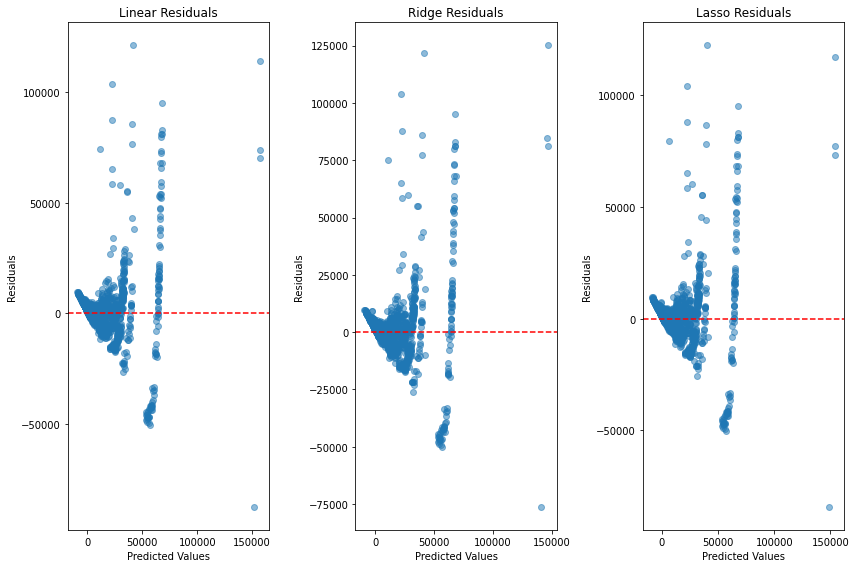

<Figure size 432x288 with 0 Axes>

In [ ]:
from ml_helper import plot_residuals

# Model names in the order they appear in the predictions dict
model_names = ['Linear', 'Ridge', 'Lasso']

# Call the plot_residuals function
plot_residuals(y_test, predictions, model_names)
plt.savefig('linear_residuals.png', dpi=300)  # Saves the plot as a high-resolution PNG file
#plt.savefig("Price Per Model Year.png", dpi=150, bbox_inches="tight")
plt.show()

## **Experiment: Random Forest**

In [ ]:
from ml_helper import train_random_forest
model, metrics, X_rftrain, X_rftest, y_rftrain, y_rftest = train_random_forest(df_filtered_encoded)

Mean Absolute Error = 765.71
Mean Squared Error = 7455134.15
Median Absolute Error = 322.01
Explained Variance Score = 0.94
R2 Score = 0.94


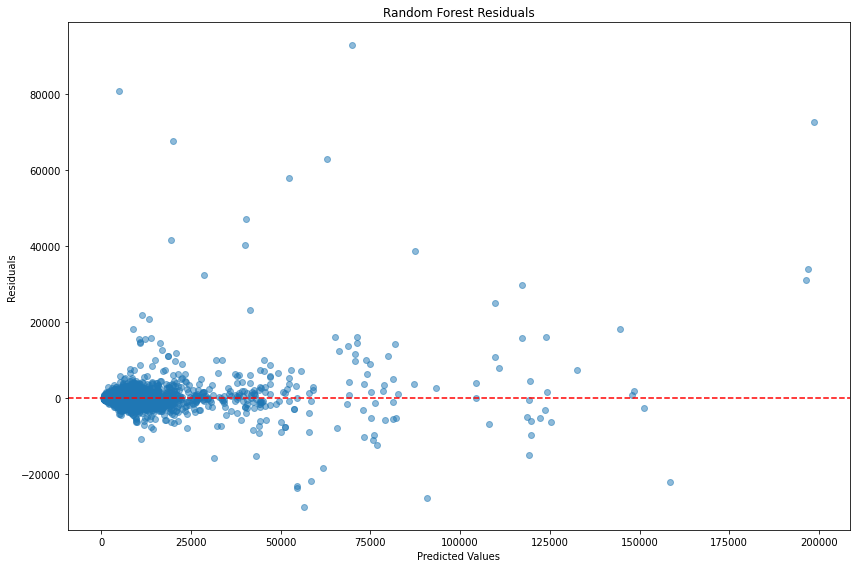

<function matplotlib.pyplot.show(close=None, block=None)>

In [ ]:
from ml_helper import plot_residuals
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Assuming df_encoded is your DataFrame and 'Price USD' is your target column
X_train, X_test, y_train, y_test = train_test_split(df_filtered_encoded.drop('Price USD', axis=1), df_filtered_encoded['Price USD'], test_size=0.2, random_state=42)

# Training the Random Forest model
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

# Making predictions
rf_predictions = random_forest_model.predict(X_test)

# Calling the plot_residuals function from your helper file
plot_residuals(y_test, {"Random Forest": rf_predictions}, ["Random Forest"])
plt.show

## **Gradient Boosting Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import sklearn.metrics as sm

def gradient_boosting_regression(df_filtered_encoded):
    # Split the data into features and target
    X_g = df_filtered_encoded.drop('Price USD', axis=1)  # Features
    y_g = df_filtered_encoded['Price USD']  # Target

    # Splitting the data into training and testing sets
    X_gtrain, X_gtest, y_gtrain, y_gtest = train_test_split(X_g, y_g, test_size=0.2, random_state=42)

    # Create and train the Gradient Boosting regression model
    gb_model = GradientBoostingRegressor()
    gb_model.fit(X_gtrain, y_gtrain)

    # Predict and evaluate the model
    y_gpred = gb_model.predict(X_gtest)

    # Calculate and print evaluation metrics
    metrics = {
        "Mean Absolute Error": sm.mean_absolute_error(y_gtest, y_gpred),
        "Mean Squared Error": sm.mean_squared_error(y_gtest, y_gpred),
        "Median Absolute Error": sm.median_absolute_error(y_gtest, y_gpred),
        "Explained Variance Score": sm.explained_variance_score(y_gtest, y_gpred),
        "R2 Score": sm.r2_score(y_gtest, y_gpred)
    }

    for metric, value in metrics.items():
        print(f"{metric} =", round(value, 2))

    return gb_model, metrics, X_gtrain, X_gtest, y_gtrain, y_gtest

# Call the function
gb_model, gb_metrics, X_gtrain, X_gtest, y_gtrain, y_gtest = gradient_boosting_regression(df_filtered_encoded)

Mean Absolute Error = 1316.25
Mean Squared Error = 12329634.97
Median Absolute Error = 722.25
Explained Variance Score = 0.9
R2 Score = 0.9


In [ ]:
plot_residuals(y_gtest, {"Gradient Boosting": g_predictions}, ["Gradien"])
plt.show

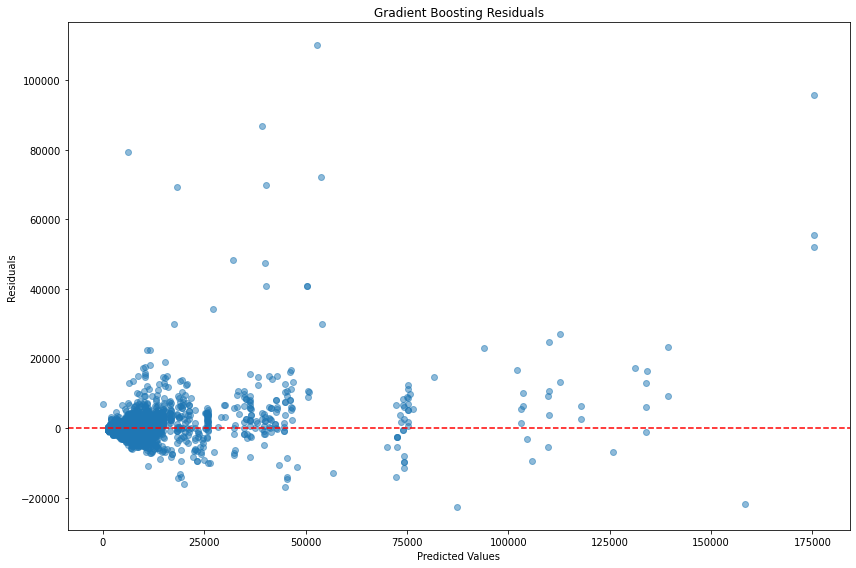

In [ ]:
# Call the plot_residuals function for Gradient Boosting
from ml_helper import plot_residuals

y_gpred = gb_model.predict(X_gtest)
plot_residuals(y_gtest, {'Gradient Boosting': y_gpred}, ['Gradient Boosting'])

In [ ]:
data_temp = {'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Gradient Boosting', 'Random Forest'],'R2 Score': [0.7, 0.7, 0.7, 0.9, 0.94]}
data = pd.DataFrame(data_temp)

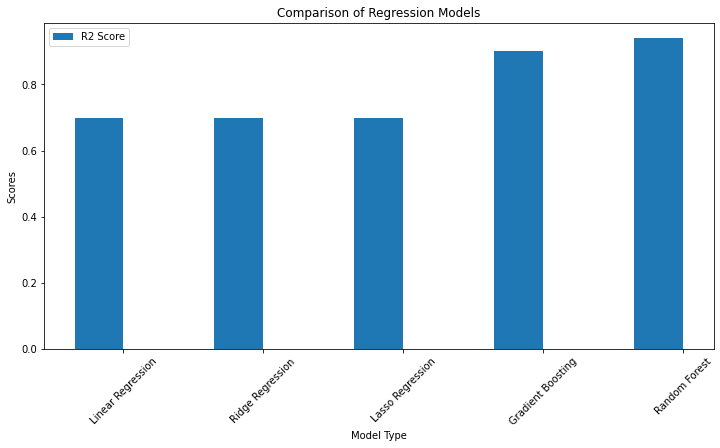

In [ ]:
from ml_helper import plot_model_performance
plot_model_performance(data, ['R2 Score'])

## **Evaluation of Models:**

In these regression experiments, various models and techniques were used to predict car prices, and their performance was evaluated using several metrics. Understanding these metrics is crucial to interpreting the effectiveness of each model:

**Mean Absolute Error (MAE):** This is the average of the absolute differences between the predicted values and the actual values. Lower MAE values indicate a model that predicts values closer to the actual values. For example, the Random Forest model had the lowest MAE (766.61), suggesting it was best at predicting prices close to their true values.

**Mean Squared Error (MSE):** Similar to MAE but squares the difference before averaging. This metric penalizes larger errors more severely than smaller ones. The Random Forest model again performed best here, with the lowest MSE (7520100.12), indicating fewer large errors in its predictions.

**Median Absolute Error:** This is the median of all absolute differences between the predicted and actual values. It can provide a better sense of typical prediction errors when the data contains outliers. The Random Forest model had the lowest median absolute error, further confirming its superior performance in typical cases.

**Explained Variance Score:** This metric measures the proportion of the variance in the dependent variable that is predictable from the independent variables. Higher scores are better, with a maximum of 1. The Random Forest (0.94) and Gradient Boosting (0.9) models showed high scores, suggesting they were effective at capturing the variance in car prices.

**R2 Score:** Also known as the coefficient of determination, it indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. Like the Explained Variance Score, a higher R2 score indicates a better fit. Both the Random Forest and Gradient Boosting models achieved high R2 scores (0.94 and 0.9, respectively), indicating strong predictive power.


**Comparing the different experiments:**

**The Random Forest model** significantly outperformed the linear models (Linear Regression, Ridge, Lasso) across all metrics, suggesting it was more capable of handling the complexity and nuances in the data.

**Gradient Boosting** also showed strong performance, though slightly behind Random Forest, indicating its effectiveness in handling non-linear relationships in the data.

Among the linear models, **Lasso and Ridge Regression with outlier removal** showed a slight improvement in Explained Variance and R2 Score compared to the basic Linear Regression models, suggesting that managing outliers and regularization slightly enhanced the model's ability to explain variability in car prices.

The use of K-Fold Cross Validation in Linear Regression showed improved results over basic Linear Regression, indicating the benefits of this technique in achieving a more generalized model.

In summary, while all models provided some level of insight into the data, **the Random Forest and Gradient Boosting models** were particularly effective, likely due to their ability to capture more complex patterns in the data, which is often necessary in real-world price prediction scenarios.